# Домашнє завдання: Візуалізація даних з Pandas

## Опис завдання
У цьому домашньому завданні ви працюватимете з датасетом про оренду велосипедів `yulu_rental.csv`. Датасет містить інформацію про кількість орендованих велосипедів залежно від погодних умов, сезону та інших факторів.
Набір даних взяти з Kaggle. Посилання на оригінальний [опис](https://www.kaggle.com/datasets/ranitsarkar01/yulu-bike-sharing-data?select=yulu_bike_sharing_dataset.csv).

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Завантаження даних
df = pd.read_csv('data/yulu_rental.csv')

In [2]:
# Перетворення datetime у правильний формат
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour

## Завдання 0: Перегляд даних
**Завдання:**
Перегляньте дані, їх розмір, та напишіть висновок:
- скільки даних в наборі
- який рівень деталізації мають ці дані, тобто за який період міститься дані в одному рядку даних ?

In [3]:
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,day,week,weekday_num,weekday,year,month,hour
datetime,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011-01-01,1,52,5,Saturday,2011,1,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011-01-01,1,52,5,Saturday,2011,1,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011-01-01,1,52,5,Saturday,2011,1,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011-01-01,1,52,5,Saturday,2011,1,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011-01-01,1,52,5,Saturday,2011,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012-12-19,19,51,2,Wednesday,2012,12,19
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012-12-19,19,51,2,Wednesday,2012,12,20
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012-12-19,19,51,2,Wednesday,2012,12,21


Даних 10886 рядків і 19 колонок. В кожному рядку містяться дані загальної кількості (сума) орендованих велосипедів за 1 годину.

Даних 10886 рядків, 14 колонок.
В кожному рядку сума оренд велосипедів за 1 годину.

## Завдання 1: Базовий лінійний графік

**Завдання:**
1. Згрупуйте дані про кількість орендованих велосипедів (`count`) поденно.
2. Побудуйте з методом `DataFrame.plot()` лінійний графік поденної кількості орендованих велосипедів (`count`) за весь період в даних.
3. Налаштуйте розмір графіка (12x6), додайте заголовок "Динаміка оренди велосипедів" та сітку.
4. Дайте відповіді на питання по цьому графіку. Якщо треба - проведіть додаткові програмні операції для відповідей.

**Питання для інтерпретації:**
1. Як гадаєте, чому графік має "заломи", чим це спричинено і як ви б могли прибрати заломи?
2. Які загальні тенденції ви бачите на графіку?
3. Чи помітні якісь сезонні коливання?
4. Чи є періоди з аномально високими або низькими значеннями і чому на ваш погляд можуть бути ці аномалії?


In [4]:
daily_rent = df['count'].resample('D').sum()

In [5]:
daily_rent

datetime
2011-01-01     985
2011-01-02     801
2011-01-03    1349
2011-01-04    1562
2011-01-05    1600
              ... 
2012-12-15    5047
2012-12-16    3786
2012-12-17    4585
2012-12-18    5557
2012-12-19    5267
Freq: D, Name: count, Length: 719, dtype: int64

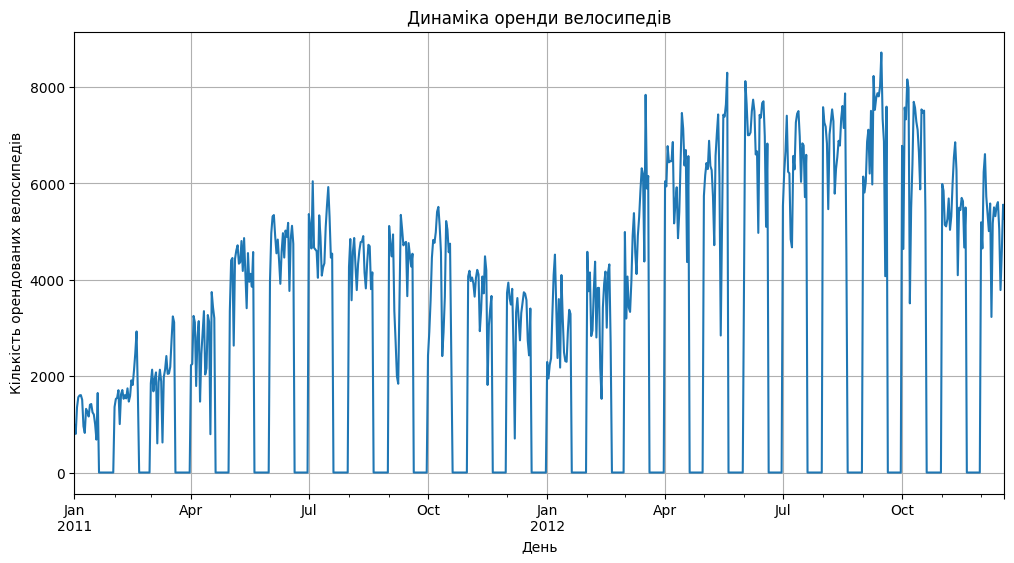

In [6]:
daily_rent.plot(
    kind='line',
    figsize=(12, 6),
    title='Динаміка оренди велосипедів',
    xlabel='День',
    ylabel='Кількість орендованих велосипедів',
    grid=True
);

In [7]:
daily_rent[daily_rent == 0]

datetime
2011-01-20    0
2011-01-21    0
2011-01-22    0
2011-01-23    0
2011-01-24    0
             ..
2012-11-26    0
2012-11-27    0
2012-11-28    0
2012-11-29    0
2012-11-30    0
Name: count, Length: 263, dtype: int64

In [8]:
# Приклад: агрегація з workingday
daily_rent_df = df.resample('D').agg({
    'count': 'sum',
    'workingday': 'max'
}).reset_index()

# Дні з нульовою орендою
zero_rent_days = daily_rent_df[daily_rent_df['count'] == 0]

# Дивимось, які вони по workingday
print(zero_rent_days)
print(zero_rent_days['workingday'].value_counts(normalize=True))

      datetime  count  workingday
19  2011-01-20      0         NaN
20  2011-01-21      0         NaN
21  2011-01-22      0         NaN
22  2011-01-23      0         NaN
23  2011-01-24      0         NaN
..         ...    ...         ...
695 2012-11-26      0         NaN
696 2012-11-27      0         NaN
697 2012-11-28      0         NaN
698 2012-11-29      0         NaN
699 2012-11-30      0         NaN

[263 rows x 3 columns]
Series([], Name: proportion, dtype: float64)


**Додаткові обчислення показали, що для днів із нульовою орендою немає даних щодо того, чи є цей день робочим чи вихідним. Для того, щоб глибше розібратись з просадками на графіку варто надалі попрацювати зі стовпцем workingday щоб з'ясувати причину відсутності даних по деяким дням (а їх достатньо багато - 263).**


## Завдання 2: Аналіз сезонності (Bar Plot)

**Завдання:**
Побудуйте вертикальну стовпчасту діаграму середньої кількості орендованих велосипедів за сезонами. Додайте підписи осей і заголовок.

Просунуте доповнення:
1. Позначте сезони не числом, а назвою на візуалізації.
2. Додайте підписи над стовпцями зі значеннями в кожному стовпці.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В який сезон найбільша середня кількість оренди велосипедів?
2. Як ви можете пояснити таку сезонну закономірність?
3. У скільки разів відрізняється оренда між найпопулярнішим та найменш популярним сезоном?

In [9]:
season_mapping = {
    1: 'Весна',
    2: 'Літо',
    3: 'Осінь',
    4: 'Зима'
}
df['season_name'] = df['season'].map(season_mapping)
season_avg = df.groupby('season_name')['count'].mean().sort_values()
print(season_avg)

season_name
Весна    116.343261
Зима     198.988296
Літо     215.251372
Осінь    234.417124
Name: count, dtype: float64


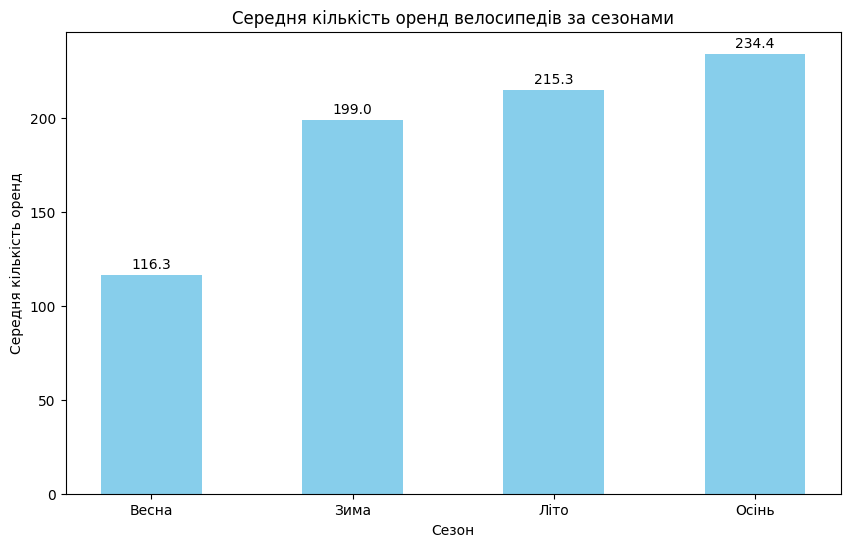

In [10]:
plt.figure(figsize=(10,6))
bars = plt.bar(
    season_avg.index,
    season_avg.values,
    color='skyblue',
    width=0.5)
plt.xlabel('Сезон')
plt.ylabel('Середня кількість оренд')
plt.title('Середня кількість оренд велосипедів за сезонами')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, round(yval, 1), 
             ha='center', va='bottom')
plt.show()

In [11]:
a = season_avg.max()  # максимальне середнє значення
b = season_avg.min()  # мінімальне середнє значення
ratio = a / b        # відношення
print(f"Максимальне значення (a): {a:.2f}")
print(f"Мінімальне значення (b): {b:.2f}")
print(f"Відношення a/b: {ratio:.2f}")

Максимальне значення (a): 234.42
Мінімальне значення (b): 116.34
Відношення a/b: 2.01


**Відповіді на питання для інтерпретації:**
1. Найбільша середня кількість оренди велосипедів восени - 234,42 оренди в середньому.
2. Сезонна закономірність пояснюється тим, що восени сприятлива погода, активний сезон для навчаня та роботи.
3. Оренда між найпопулярнішим та найменш популярним сезоном відрізняється у 2,01 раз, тобто оренда восени вдвічі більша, ніж оренда навесні.

## Завдання 3: Динаміка за місяцями (Line Plot)

**Завдання:**
Створіть лінійний графік середньої кількості оренди велосипедів по місяцях (тобто групування в рамках місяця і беремо середню кількість оренд в цей місяць з кількох років). Використайте маркери-кружечки для точок, додайте сітку та пофарбуйте лінію у червоний колір.

Просунуте доповнення:
- додайте аби по осі ОХ поділки були чітко на кожен окремий місяць по одній. Тобто сумарно 12 поділок.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які місяці спостерігається пік та спад оренди?
2. Чи збігається ця закономірність з результатами з попереднього завдання?
3. Як може вплинути клімат на оренду велосипедів протягом року?


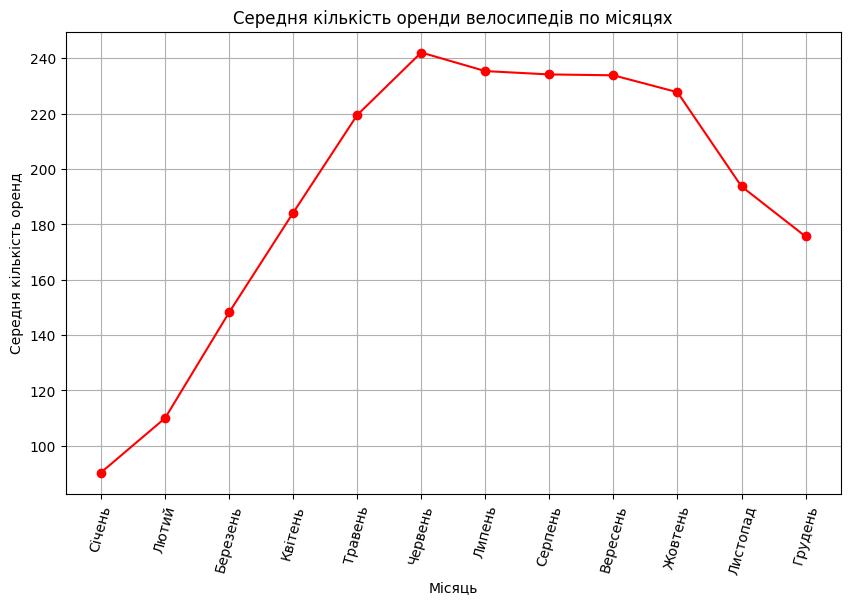

In [12]:
monthly_avg = df.groupby('month')['count'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(
    monthly_avg['month'],
    monthly_avg['count'],
    marker='o',
    color='red'
)
plt.title('Середня кількість оренди велосипедів по місяцях')
plt.xlabel('Місяць')
plt.ylabel('Середня кількість оренд')
ukr_months = [
    'Січень', 'Лютий', 'Березень', 'Квітень',
    'Травень', 'Червень', 'Липень', 'Серпень',
    'Вересень', 'Жовтень', 'Листопад', 'Грудень'
]
plt.xticks(range(1, 13), ukr_months, rotation = 75)
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

**Відповіді на питання для інтерпретації:**
1. З червня по вересень включно (06-09 місяці) спостерігається пік оренди велосипедів. З жовтня (10 місяць) відбувається спад оренди
2. Ця закономірність збігається з результатами попереднього завдання: маємо вищі значення влітку і менші взимку — лінійний тренд підтвердив сезонність.
3. Клімат має безпосередній вплив на оренду велосипедів протягом року: чим тепліше і сухіше, тим більше людей обирають велосипед.

## Завдання 4: Розподіл погодних умов (Pie Chart)

**Завдання:**
1. Побудуйте кругову діаграму з часткою записів з різними погодними умовами.
2. Додайте підписи з відсотками та легенду з описами погоди (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ).
3. Визначте свої відмінні від стандартних кольори для відображення кожної категорії.
4. Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. Яка погода переважає в датасеті?
2. Чи є дні із сильним дощем? Яка їх частка?
3. Як ви думаєте, як погодні умови впливають на попит на оренду велосипедів?

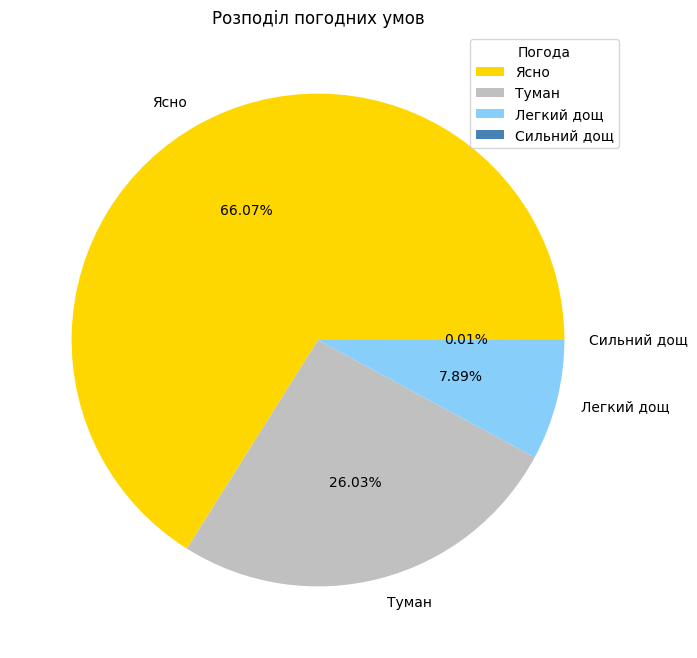

In [13]:
weather_counts = df['weather'].value_counts().sort_index()
labels = ['Ясно', 'Туман', 'Легкий дощ', 'Сильний дощ']
colors = ['#FFD700', '#C0C0C0', '#87CEFA', '#4682B4']
plt.figure(figsize=(8,8))
plt.pie(
    weather_counts,
    labels=labels,
    autopct='%1.2f%%',
    colors=colors,
    startangle=0
)
plt.title('Розподіл погодних умов')
plt.legend(labels, title="Погода", loc="best")
plt.show()

**Відповіді на питання для інтерпретації:**
1. В датасеті переважає ясна погода (66,07 %).
2. Дні із сильним дощем є, але їх частка дуже незначна - 0,01 %.
3. Погодні умови безпосередньо впливають на попит на оренду велосипедів: чим гірші погодні умови (дощ, туман), тим менше людей беруть в оренду велосипеди.

## Завдання 5: Box Plot для аналізу викидів

**Завдання:**
Створіть коробковий графік (box plot) кількості орендованих велосипедів для кожного типу погоди.

Просунуте доповнення:
- Використайте горизонтальну орієнтацію.
- Позначте погодні умови не числом, а назвою на візуалізації.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. При якій погоді найбільший розкид у кількості оренди?
2. Чи є викиди (outliers) в даних? При якій погоді?
3. При якій погоді медіанне значення оренди найвище?

In [14]:
weather_labels = {
    1: 'Ясно',
    2: 'Туман',
    3: 'Легкий дощ',
    4: 'Сильний дощ'
}
ordered_labels = list(weather_labels.values())
df['weather_label'] = df['weather'].map(weather_labels)
df['weather_label'] = pd.Categorical(df['weather_label'], categories=ordered_labels, ordered=True)
grouped_data = df.groupby('weather_label', observed=True)['count'].apply(list)

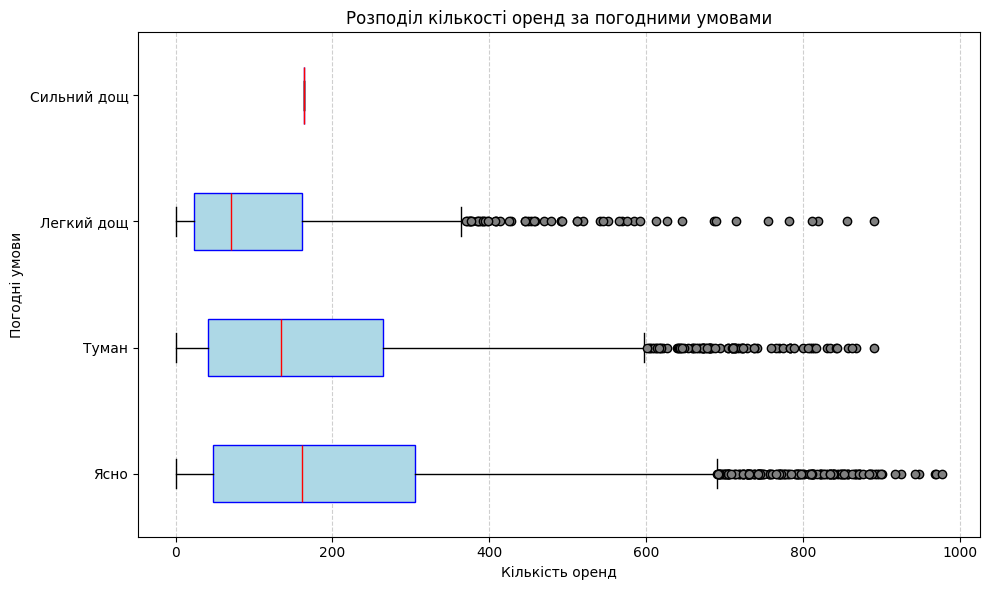

In [15]:
plt.figure(figsize=(10, 6))
plt.boxplot(
    grouped_data,
    vert=False, 
    patch_artist=True,
    boxprops=dict(facecolor='lightblue', color='blue'),
    medianprops=dict(color='red'),
    flierprops=dict(marker='o', markerfacecolor='gray', markersize=6)
)
plt.yticks(ticks=range(1, len(grouped_data) + 1), labels=grouped_data.index)
plt.title('Розподіл кількості оренд за погодними умовами')
plt.xlabel('Кількість оренд')
plt.ylabel('Погодні умови')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Відповіді на питання для інтерпретації:**
1. При ясній погоді спостерігається найбільший розкид у кількості оренди, що свідчить про значну варіативність попиту у ці дні.
2. Так, викиди (outliers) при всіх типах погоди, окрім сильного дощу. Найбільше викидів при яскій погоді.
3. Найвище медіанне значення оренди спостерігається при ясній погоді, тобто саме в ці дні попит на велосипеди в середньому найвищий.

Отже, попит на оренду велосипедів залежить від погодних умов — найсприятливіші умови сприяють більшій активності користувачів.

## Завдання 6: Кореляція температури та оренди (Scatter Plot)

**Завдання:**
Побудуйте діаграму розсіювання залежності між температурою (`temp`) та загальною кількістю оренди (`count`). Розфарбуйте точки за сезонами, додайте напівпрозорість (alpha=0.6).

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
- Чи є зв'язок між температурою та кількістю оренди? Який?

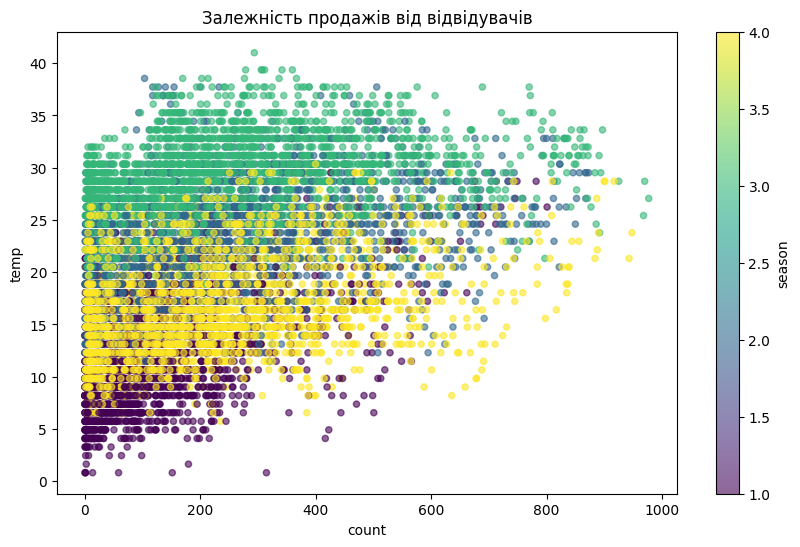

In [16]:
df.plot.scatter(
    x='count',
    y='temp',
    c='season',
    colormap='viridis',
    title='Залежність продажів від відвідувачів',
    figsize=(10, 6),
    alpha=0.6,
    colorbar=True
)
plt.show()

**Відповідь на питання для інтерпретації:**
Так, між температурою та кількістю оренди є прямий зв'язок: чим вища температура, тим, більша кількість оренди велосипедів.
На діаграмі розсіювання видно згущення точок у верхній частині при вищій температурі.
Колірна шкала сезонів також підтверджує, що весна–літо пов’язані з більшою кількістю оренд.

## Завдання 7: Порівняння користувачів (Stacked Bar Chart)

**Завдання:**
Ми хочемо дізнатись як по дням тижня беруть в середньому в оренду велосипеди випадкові і зареєстровані користувачі.

Створіть стовпчасту діаграму з накопиченням (bar з налаштуванням `stacked=True`), яка показує співвідношення випадкових (`casual`) та зареєстрованих (`registered`) користувачів по днях тижня за кількістю взятих ними велосипедів в оренду в середньому. Використайте різні кольори для типів користувачів.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які дні тижня більше оренд від зареєстрованих користувачів?
2. Як ви можете пояснити таку різницю в поведінці користувачів протягом тижня?

In [17]:
avg_by_weekday = df.groupby('weekday_num')[['casual', 'registered']].mean()
weekday_labels = ['Понеділок', 'Вівторок', 'Середа', 'Четвер', 'Пʼятниця', 'Субота', 'Неділя']
avg_by_weekday = avg_by_weekday.reindex([0,1,2,3,4,5,6])

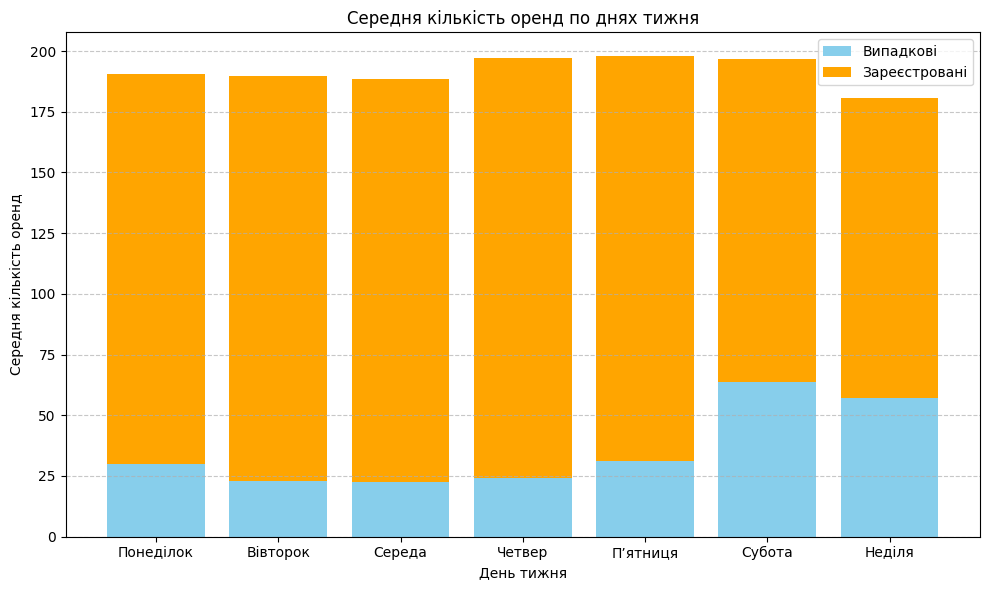

In [18]:
plt.figure(figsize=(10,6))
plt.bar(weekday_labels, avg_by_weekday['casual'], label='Випадкові', color='skyblue')
plt.bar(weekday_labels, avg_by_weekday['registered'], 
        bottom=avg_by_weekday['casual'], label='Зареєстровані', color='orange')
plt.title('Середня кількість оренд по днях тижня')
plt.xlabel('День тижня')
plt.ylabel('Середня кількість оренд')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Відповіді на питання для інтерпретації:**
1.Четвер, п’ятниця та субота — дні, коли зареєстровані користувачі найактивніше беруть велосипеди в оренду.
2. Четвер і п’ятниця - це кінець робочого тижня, коли люди можуть активніше пересуватися містом на велосипеді — не лише на роботу, а й по особистих справах або на зустрічі. Також у п’ятницю може зростати кількість поїздок у вільний час, після завершення робочого дня.
Використання у суботу може свідчити про те, що частина зареєстрованих користувачів використовує велосипед і у вихідні — для активного відпочинку, поїздок на дачу, прогулянок тощо. Також це може бути мобільно активна молодь або постійні користувачі, які віддають перевагу велосипеду у вихідний.
Випадкові (casual) користувачі можуть бути активні лише у вихідні, а зареєстровані — у п’ятницю та суботу, коли в них більше вільного часу, але є звичка до використання велосипеда.
Отже, зареєстровані користувачі активно використовують велосипеди не тільки у будні, а й у період “перед вихідними”, що свідчить про гнучке використання транспорту в місті, сталі звички або навіть зміщення трудової активності на кінець тижня.